In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#loading data
df = pd.read_csv('/content/IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(147, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
# Storing the data features in the variable 'X' and output in the variable 'y'..
x = df.drop(['species'], axis = 1)
y = df['species']


In [ ]:
# Encoding the categorical column 'iris-Species' using Label Encoder.
y_encoded = pd.get_dummies(y)

In [ ]:

# Splitting the dataset into an 80% training set and a 20% testing set.
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(24, activation="relu", input_dim=4))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3,activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 4s 187ms/step - loss: 1.1698 - accuracy: 0.3162 - val_loss: 1.0718 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 1.0920 - accuracy: 0.3162 - val_loss: 1.0304 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 1.0480 - accuracy: 0.3162 - val_loss: 1.0139 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 48ms/step - loss: 1.0291 - accuracy: 0.3162 - val_loss: 1.0022 - val_accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 1.0135 - accuracy: 0.3162 - val_loss: 0.9854 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.9970 - accuracy: 0.3932 - val_loss: 0.9684 - val_accuracy: 0.4667
Epoch 7/100
4/4 [==============================] - 0s 30ms/step - loss: 0.9828 - accuracy: 0.3675 - val_loss: 0.9545 - val_accuracy: 0.4333
Epoch 8/100
4/4 [==

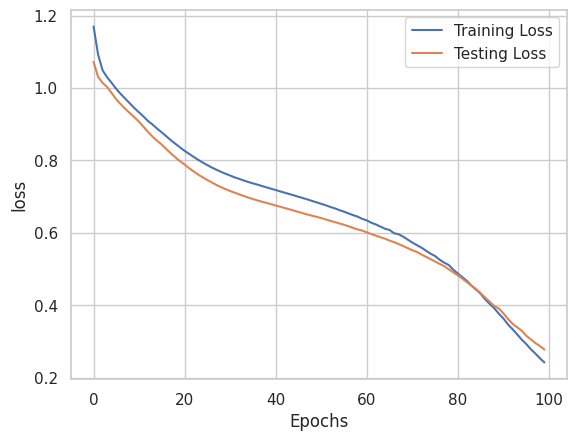

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(history.history['loss'], label='Training Loss')
sns.lineplot(history.history['val_loss'], label='Testing Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=0)
print('Testing Loss: %.2f' % loss_test)
print('Testing Accuracy: %.2f' % (accuracy_test * 100) + '%')
print("*" * 30)
print('Training Loss: %.2f' % loss_train)
print('Training Accuracy: %.2f' % (accuracy_train * 100) + '%')

Testing Loss: 0.28
Testing Accuracy: 93.33%
******************************
Training Loss: 0.23
Training Accuracy: 98.29%
